# Introductory Applied Machine Learning (IAML) Coursework 1 - Semester 2, January 2021.

### Author: Nigel Goddard

## Important Instructions

#### It is important that you follow the instructions below carefully for things to work properly.

You need to set up and activate your environment as you would do for your labs, see Learn section on Labs.  **You will need to use Noteable to create one of the files you will submit (the PDF)**.  Do **NOT** create the PDF in some other way, we will not be able to mark it.  If you want to develop your answers in your own environment, you should make sure you are using the same packages we are using, by running the cell which does imports below.

Read the instructions in this notebook carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the required code/markdown cell.

The .csv files that you will be using are located in the ./datasets directory that is included in the git repository with this file.

Keep your answers brief and concise. Most written questions can be answered in 2-3 lines, a few will take longer.

Make sure to distinguish between attributes (columns of the data) and features (which typically refers only to the independent variables, i.e. excluding the target variables).

Make sure to show all your code/working.

Write readable code. While we do not expect you to follow PEP8 to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. Do use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. 

You will see <html>\\pagebreak</html> at the start of each subquestion.  ***Do not remove these, if you do we will not be able to mark your coursework.***

### SUBMISSION Process
This assignment will account for 20% of your final mark. We ask you to submit answers to all questions.

You will submit a PDF of your Notebook, and the Notebook itself.  Your grade will be based on the PDF, we will only use the Notebook if we need to see details.  **You must use the following procedure to create the materials to submit and then submit them**.

1. Make sure your Notebook and the datasets are in Noteable and will run.  If you developed your answers in Noteable, this is already done.  If you developed your answers in your own environment, you will need to uploading your Notebook  to Noteable and make sure it runs ok.

2. Select **Kernel->Restart & Run All** to create a clean copy of your submission, this will run the cells in order from top to bottom.  This may take a while (minutes) to complete, ensure that all the output and plots have completed before you proceed by waiting for the last cell's banner message to be printed.

3. Select **File->Download as->PDF via LaTeX (.pdf)** and wait for the PDF to be created and downloaded.

4. Select **File->Download as->Notebook (.ipynb)**

5. You now should have in your download folder the pdf and the notebook.  Rename them ***sNNNNNNN.pdf*** and ***sNNNNNNN.ipynb***, where sNNNNNNN is your matriculation number (student number), e.g. s1234567.

6. Now submit **the PDF** to Gradescope on Learn.  There is video guidance on Learn (***Assessment->Assignment Submission***) on how to do this.  It is **very important** that during Gradescope submission you **indicate which pages of your PDF correspod to which of the questions** - the video gives guidance on this, you can tick multiple pages for each question.

7. Finally submit the Notebook itself (named as indicated in **5** above) to Learn.  You do this at ***Assessment->Assignment Submission->Assignment 1 - Submit your Notebook***

The submission deadline for this assignment is **9th February 2021 at 16:00 UK time (UTC)**.  Don't leave it to the last minute!

#### IMPORTS
Execute the cell below to import all packages you will be using for this assignment.  If you are not using Noteable, make sure the python and package version numbers reported match the python and package numbers specified in the comment at the end of this cell.

In [1]:
%config IPCompleter.greedy=True
import os
import platform
import sys
import sklearn
import numpy as np
np.random.seed(260393)
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

import warnings 
warnings.filterwarnings('ignore')

print("All packages imported!")
print("python=={}".format(platform.python_version()))
print("seaborn=={}".format(sns.__version__))
print("scikit-learn=={}".format(sklearn.__version__))
print("pandas=={}".format(pd.__version__))
print("numpy=={}".format(np.__version__))
print("matplotlib=={}".format(mp.__version__))

# You should see this output:
# All packages imported!
# python==3.7.6
# seaborn==0.11.0
# scikit-learn==0.23.2
# pandas==1.1.4
# numpy==1.19.4
# matplotlib==3.2.2


All packages imported!
python==3.7.6
seaborn==0.10.1
scikit-learn==0.23.2
pandas==1.1.4
numpy==1.19.4
matplotlib==3.2.2


\pagebreak

# Question 1 Linear Regression

#### 88 marks out of 190 for this coursework

### House Prices Dataset

The aim of this task is to predict house prices in Melbourne, Victoria, Australia using Linear Regression. The dataset consists of [historic data of houses sold over several years](https://www.kaggle.com/anthonypino/melbourne-housing-market).


***Attribute description:***

- Suburb: Suburb
- Address: Address
- Rooms: Number of bedrooms
- Price: Price in Australian dollars
- Method: sale method (we won't use this)
- Type: h (house), u (apartment), t (townhouse)
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from Central Business District in kilometres
- Regionname: General Region
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size in Sq. Metres
- BuildingArea: Building Size in Sq. Metres
- YearBuilt: Year the house was built
- CouncilArea: Governing council for the area
- Lattitude: Latitude
- Longtitude: Longitude


\pagebreak

# ========== Question 1.1 --- [21 marks] ==========

Answer (in brief) the following questions:

1. [Text]A How do regression and classification tasks differ in Machine Learning? Give an example of each. 
2. [Code]A Read in the Melbourne_housing.csv data and name it ***aushouse***. Use functions to describe the dataset.
3. [Text]A Comment on the characteristics of the attributes just displayed, including where data might be missing. Describe two different strategies for dealing with the missing data. 

(1) How do regression and classification tasks differ in Machine Learning? Give an example of each.

(1) ***Your answer goes here:***  
Regression is about to predict a continuous value based on the input data, example: predict house prices in Melbourne from other features.  
Classification is about to distinguish the identity/class/label from the input data, example: distinguish the Melbourne house's type based on other attributes.

(2) Read in the Melbourne housing data and name it ***aushouse***. Use functions to describe the dataset.

In [2]:
#(2) # your code goes here
data_path = os.path.join(os.getcwd(), 'datasets', 'Melbourne_housing.csv')
aushouse = pd.read_csv(data_path, delimiter = ',')
aushouse.describe(include='all')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,34857,34857,34857.000000,34857,2.724700e+04,34857,34857,34857,34856.000000,34856.000000,...,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,34854,26881.000000,26881.000000,34854,34854.000000
unique,351,34009,NaN,3,NaN,9,388,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,5 Charles St,NaN,h,NaN,S,Jellis,28/10/2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN
freq,844,6,NaN,23980,NaN,19744,3359,1119,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3675,NaN,NaN,11836,NaN
mean,NaN,NaN,3.031012,NaN,1.050173e+06,NaN,NaN,NaN,11.184929,3116.062859,...,1.624798,1.728845,593.598993,160.25640,1965.284097,NaN,-37.810634,145.001851,NaN,7572.888306
std,NaN,NaN,0.969933,NaN,6.414671e+05,NaN,NaN,NaN,6.788892,109.023903,...,0.724212,1.010771,3398.841946,401.26706,37.313335,NaN,0.090279,0.120169,NaN,4428.090313
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,...,0.000000,0.000000,0.000000,0.00000,1196.000000,NaN,-38.190430,144.423790,NaN,83.000000
25%,NaN,NaN,2.000000,NaN,6.350000e+05,NaN,NaN,NaN,6.400000,3051.000000,...,1.000000,1.000000,224.000000,102.00000,1940.000000,NaN,-37.862950,144.933500,NaN,4385.000000
50%,NaN,NaN,3.000000,NaN,8.700000e+05,NaN,NaN,NaN,10.300000,3103.000000,...,2.000000,2.000000,521.000000,136.00000,1970.000000,NaN,-37.807600,145.007800,NaN,6763.000000
75%,NaN,NaN,4.000000,NaN,1.295000e+06,NaN,NaN,NaN,14.000000,3156.000000,...,2.000000,2.000000,670.000000,188.00000,2000.000000,NaN,-37.754100,145.071900,NaN,10412.000000


(3) Comment on the characteristics of the attributes just displayed, including where data might be missing. Describe two different strategies for dealing with the missing data.

In [3]:
print(aushouse.info())
print('number of samples:{}'.format(aushouse.index.stop))
print('missing data:')
print(aushouse.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

(3) ***Your answer goes here:***
The data include 21 attributes, and include both text values and numerical values. Missing data exist in "Price", "Distance", "Postcode", "Bedroom2", "Bathroom", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount".  
The two ways of dealing with the missing data include:  
1. Ignore attribute in the instance where its value is missing, or just drop the sample with that missing value  
2. Use inferred value such as average or medium to fill the missing value

\pagebreak

# ========== Question 1.2 --- [10 marks] ==========

Answer (in brief) the following questions:

1. [Text]B One feature that could well be important in predicting price is the Type of property (house, apartment or townhouse).  What type of feature is this, and why can't we use it in linear regression?  Describe a method for using information from this type of feature in linear regression.
2. [Code]B Convert the Type feature using the method you described above. Remove features which cannot be used for linear regression, and the YearBuilt feature which we won't use.

(1) One feature that could well be important in predicting price is the Type of property (house, apartment or townhouse).  What type of feature is this, and why can't we use it in linear regression?  Describe a method for using information from this type of feature in linear regression (6)

(1) ***your answer goes here:***  
This is the categorical feature which provide some class information of that sample.  
Because these categorical features do not present any meaningful information to linear regression. For example, if we set house=1, apartment=2, townhouse=3, then the townhouse would contribute 3 times than the house to the linear estimator, which is totally meaningless.  
We can encode this type of feature as a one-hot numeric array(one-hot encode) like we can divide the Type of property to three different attributes:"isHouse", "isApartment", "isTownhouse".

(2) Convert the Type feature using the method you described above (if they used a different method, if you can easily see if their code matches their method then give them marks for it). Remove features which cannot be used for linear regression, and the YearBuilt feature which we won't use, and show a correlation heatmap with values

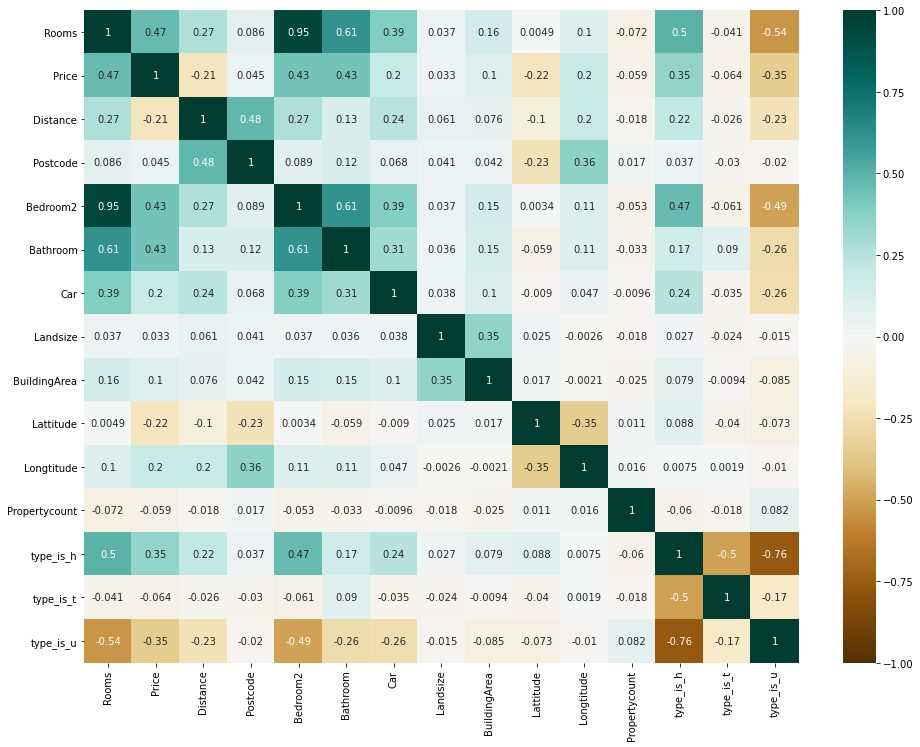

In [4]:
# (2) # Your code goes here
aushouse=aushouse.join(pd.get_dummies(aushouse['Type'],prefix="type_is" ))
aushouse=aushouse.drop(["Type","Suburb","Address","Method","SellerG","CouncilArea","Regionname","YearBuilt","Date"], axis=1)
plt.figure(figsize=(16,12))
sns.heatmap(aushouse.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG');

\pagebreak

# ========== Question 1.3 --- [13 marks] ==========

Answer (in brief) the following questions:

1. [Code]C Show a correlation heatmap with values.
2. [Text]C Comment on what you see in the correlation heatmap values, with regard to this task.  Which features could you drop, and why?
3. [Code]C Drop the features you've identified, and remove any instances with missing attribute values.  

(1) Show a correlation heatmap with values.

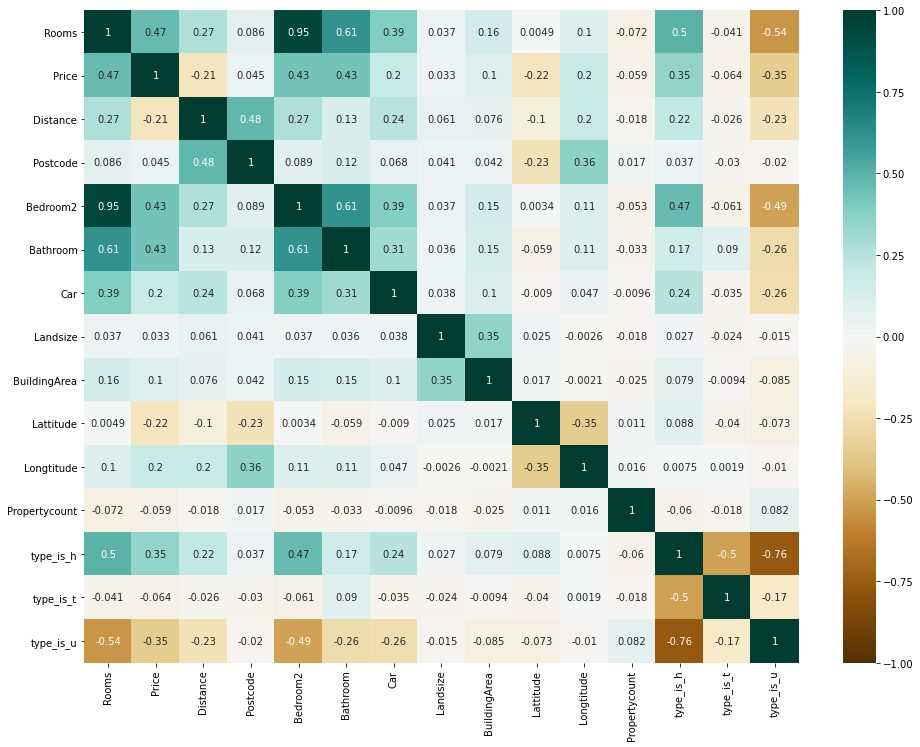

In [5]:
# (1) # Your code goes here
plt.figure(figsize=(16,12))
sns.heatmap(aushouse.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG');

(2) Comment on what you see in the correlation heatmap values, with regard to this task.  Which features could you drop, and why?

(2) ***your answer goes here***  
It is clear that there are many attributes have some certain correlations with the house price. But as we are predicting the house prices, we could drop the features which have few correlations with the price. (Postcode, Landsize, Propertycount)  
Also, we found that the "Rooms" attribute has an extreme high correlation with the "Bedroom2" attribute, so for avoiding the multicollinearity on our model, we could drop the "Bedroom2" attribute.

(3) Drop the features you have identified, and remove any instances with missing attribute values.

In [6]:
# (3) # your code goes here
aushouse = aushouse.drop(["Postcode", "Landsize", "Propertycount","BuildingArea","Bedroom2"],axis=1)
aushouse = aushouse.dropna()
aushouse

,Rooms,Price,Distance,Bathroom,Car,Lattitude,Longtitude,type_is_h,type_is_t,type_is_u
1,2,1480000.0,2.5,1.0,1.0,-37.79960,144.99840,1,0,0
2,2,1035000.0,2.5,1.0,0.0,-37.80790,144.99340,1,0,0
4,3,1465000.0,2.5,2.0,0.0,-37.80930,144.99440,1,0,0
5,3,850000.0,2.5,2.0,1.0,-37.79690,144.99690,1,0,0
6,4,1600000.0,2.5,1.0,2.0,-37.80720,144.99410,1,0,0
...,...,...,...,...,...,...,...,...,...,...
34849,3,570000.0,25.5,2.0,2.0,-37.61031,145.03393,1,0,0
34852,4,1480000.0,6.3,1.0,3.0,-37.81053,144.88467,1,0,0
34853,2,888000.0,6.3,2.0,1.0,-37.81551,144.88826,1,0,0
34854,2,705000.0,6.3,1.0,2.0,-37.82286,144.87856,0,1,0


\pagebreak

# ========== Question 1.4 --- [20 marks] ==========

Answer (in brief) the following questions:

1. [Code] Create ***X*** and ***y*** from <html><var>aushousing</var></html> and then use train_test_split to create training and test set, with the testing set being 20% of the entire data. Set the random_state to 0 for reproducibility.
Hint: Look at the Lab exercises for an example.
2. [Code] Fit a LinearRegression to the training set, print the intercept and a DataFrame showing the coefficient of each attribute.
3. [Text] Describe the meaning of the intercept and the coefficients. Comment on the coefficients, including their size, and what they tell us about the relationship between the features and the price. Are there any coefficients with surprising values?

(1) Create ***X*** and ***y*** from <html><var>aushousing</var></html> and then use train_test_split to create training and test set, with the testing set being 20% of the entire data. Set the random_state to 0 for reproducibility.

In [7]:
#(1) # your code goes here
X=aushouse.drop(["Price"],axis=1)
y=aushouse["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(2) Fit a LinearRegression to the training set, print the intercept and a DataFrame showing the coefficient of each attribute.

In [8]:
#(2) # your code goes here
reg = LinearRegression()
reg.fit(X_train,y_train)
print("intercept:{}".format(reg.intercept_))
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(pd.DataFrame(reg.coef_,index=X.columns))
# reg.score(X_test,y_test)

intercept:-188874629.21621808
                     0
Rooms        173179.14
Distance     -45649.57
Bathroom     224156.96
Car           41105.11
Lattitude  -1618177.14
Longtitude   884061.51
type_is_h    267093.63
type_is_t    -60723.05
type_is_u   -206370.58


(3) Describe the meaning of the intercept and the coefficients. Comment on the coefficients, including their size, and what they tell us about the relationship between the features and the price.  Which house properties affect the price most?  Does the type of property matter much?

(3) ***your answer goes here***  
The intercept means, if other attributes all equal to 0 (which is impossible in the real world), the house price should equal to the intercept.  
The coefficient means, when the attribute increased by one, the price would average increased the corresponded value.  
For example, the coefficient of "Rooms" is 173179, that means if a house has one more room, the price of it would average increase 173179.  
Seems the "Lattitude" and "Longitude" features have some affection to the house price, may because the house location contributes a lot to house value.
Except those, the room and bathroom number affect most to house price.  
The type of property has the certain influence to house price, a "house"'s price would be 267093-(-206370)=473463 higher than a "townhouse" even if other conditions are same.


\pagebreak

# ========== Question 1.5 --- [24 marks] ==========

Answer (in brief) the following questions:

1. [Code] Print the Root Mean Squared Error (RMSE) and <html><var>R<sup>2</sup></var></html>.
2. [Text] Explain the meaning and output of the RMSE and <html><var>R<sup>2</sup></var></html>. What do they tell us about the fit of the data?

(1) Print the Root Mean Squared Error (RMSE) and <html><var>R<sup>2</sup></var></html>.

In [9]:
# (1) # Your code goes here
print("RMSE:{}".format(mean_squared_error(y_test,reg.predict(X_test),squared=False)))
print("R2:{}".format(r2_score(y_test,reg.predict(X_test))))

RMSE:463422.5517342872
R2:0.5179844717176435


(2) Explain the meaning and output of the RMSE and <html><var>R<sup>2</sup></var></html>. What do they tell us about the fit of the data?

(2) ***Your answer goes here:***  
RMSE express standard deviation of the prediction errors or say it is a measure about the distance of the regression line to the real data point.
If RMSE is low, that means the regression is very close to the real data point and vice versa.
R2 is a measure of how close the data are to the fitted regression line.
R2 is always between 0 and 100%, and the higher of R2, the model can explain the more variability of the real data.  
In here our model gets R2=0.518, which means this model can explain 51.8% of the variability of the house price.

\pagebreak

# Question 2 Naive Bayes

#### 102 marks out of 190 for this coursework

### Income dataset

The aim of this task is to predict whether a United States person has income over \$50,000. The dataset is derived from the [1994 US census data](https://archive.ics.uci.edu/ml/datasets/Adult).

***Attribute description:***

attributes in _italics_ are ones we will not use

- _age: age in years_
- work: working status
- _fnlwgt: weighting factor_
- edu: education level
- _edunum: years of education_
- marit: marital-status
- occ: occupation
- rel: relationship status
- race: race.
- sex: sex
- _cg: capital-gains_
- _cl: capital-losses_
- _hours: hours of work per week_
- nat: national origin
- over50k: income over $50,000


\pagebreak

# ========== Question 2.1 --- [16 marks] ==========

Answer (in brief) the following questions:  

1. [Text] Why is the Naive Bayes method called that?  What is "naive" about it and what is Bayesian about it?
2. [Code] Read in the income data (income.csv) and name it income.  Remove attributes we won't use (in _italics_ in the list above, i.e _age, fnlwgt, edunum, cg, cl, hours_), and remove instances with missing data.
3. [Code] Use a library function to show the attributes, their type, and how many there are of each.
4. [Code] We'll use the integer attribute as the class to predict.  How many classes are there, and what integer values to they have?
5. [Code] Use another library function to show details about each of the other attributes (the features), including the frequency of the most prevalent category.

(1) Why is the Naive Bayes method called that?  What is "naive" about it and what is Bayesian about it?

***your answer goes here***  
Naive Bayes is based on the Bayes' theorem and with the naive independence assumptions between different features, so-called Naive Bayes.  
Naive means this method does a naive assumption: the value of every particular feature is independent to any other feature  
Bayes' theorem: P(A|B)=P(B|A)*P(A)/P(B)  
where A and B are events and P(B) != 0.  
And bayesian classification is a general term for a class of classification algorithms, which are based on Bayes' theorem

(2) Read in the income data (income.csv) and name it income.  Remove attributes we won't use (in _italics_ in the list above), and remove instances with missing data.

In [10]:
#(2) # Your code goes here
income_path = os.path.join(os.getcwd(), 'datasets', 'income.csv')
income = pd.read_csv(income_path, delimiter = ',')
income = income.drop(["age","fnlwgt","edunum","cg","cl","hours"],axis=1)
income = income.dropna()
income

,work,edu,marital,occ,rel,race,sex,nat,over50k
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,0
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,1
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,0
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,0


(3) Use a library function to show the attributes, their type, and how many there are of each.

In [11]:
#(3) # Your code goes here
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   work     32561 non-null  object
 1   edu      32561 non-null  object
 2   marital  32561 non-null  object
 3   occ      32561 non-null  object
 4   rel      32561 non-null  object
 5   race     32561 non-null  object
 6   sex      32561 non-null  object
 7   nat      32561 non-null  object
 8   over50k  32561 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 2.5+ MB


(4) We'll use the integer attribute as the class to predict.  How many classes are there, and what integer values to they have?

In [12]:
#(4) # Your code goes here
print('Number of class: {}'.format(len(income['over50k'].unique())))
print('Integer values: {}'.format(income['over50k'].unique()))

Number of class: 2
Integer values: [0 1]


Use another library function to show details about each of the other attributes (the features), including the frequency of the most prevalent category.

In [13]:
#(5) # Your code goes here
income.describe(include='all')

,work,edu,marital,occ,rel,race,sex,nat,over50k
count,32561,32561,32561,32561,32561,32561,32561,32561,32561.00
unique,9,16,7,15,6,5,2,42,nan
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,nan
freq,22696,10501,14976,4140,13193,27816,21790,29170,nan
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.43
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


\pagebreak

# ========== Question 2.2 --- [16 marks] ==========

Answer (in brief) the following questions:  

1. [Code] List the feature names.  
2. [Code] Use seaborn functions to show a bar chart for each of the features of the number of instances with each attribute value, with distinct counts for each target class shown side by side.
3. [Text] Comment on the plots you've created. Are there rare categories? Do the features look like they will be good for the classification task?

(1) List the feature names. 

In [14]:
#(1) # Your code goes here
for c in income.columns:
    if(c!="over50k"):
        print(c)

work
edu
marital
occ
rel
race
sex
nat


(2) Use seaborn functions to show a bar chart for each of the features of the number of instances with each attribute value, with distinct counts for each target class shown side by side.

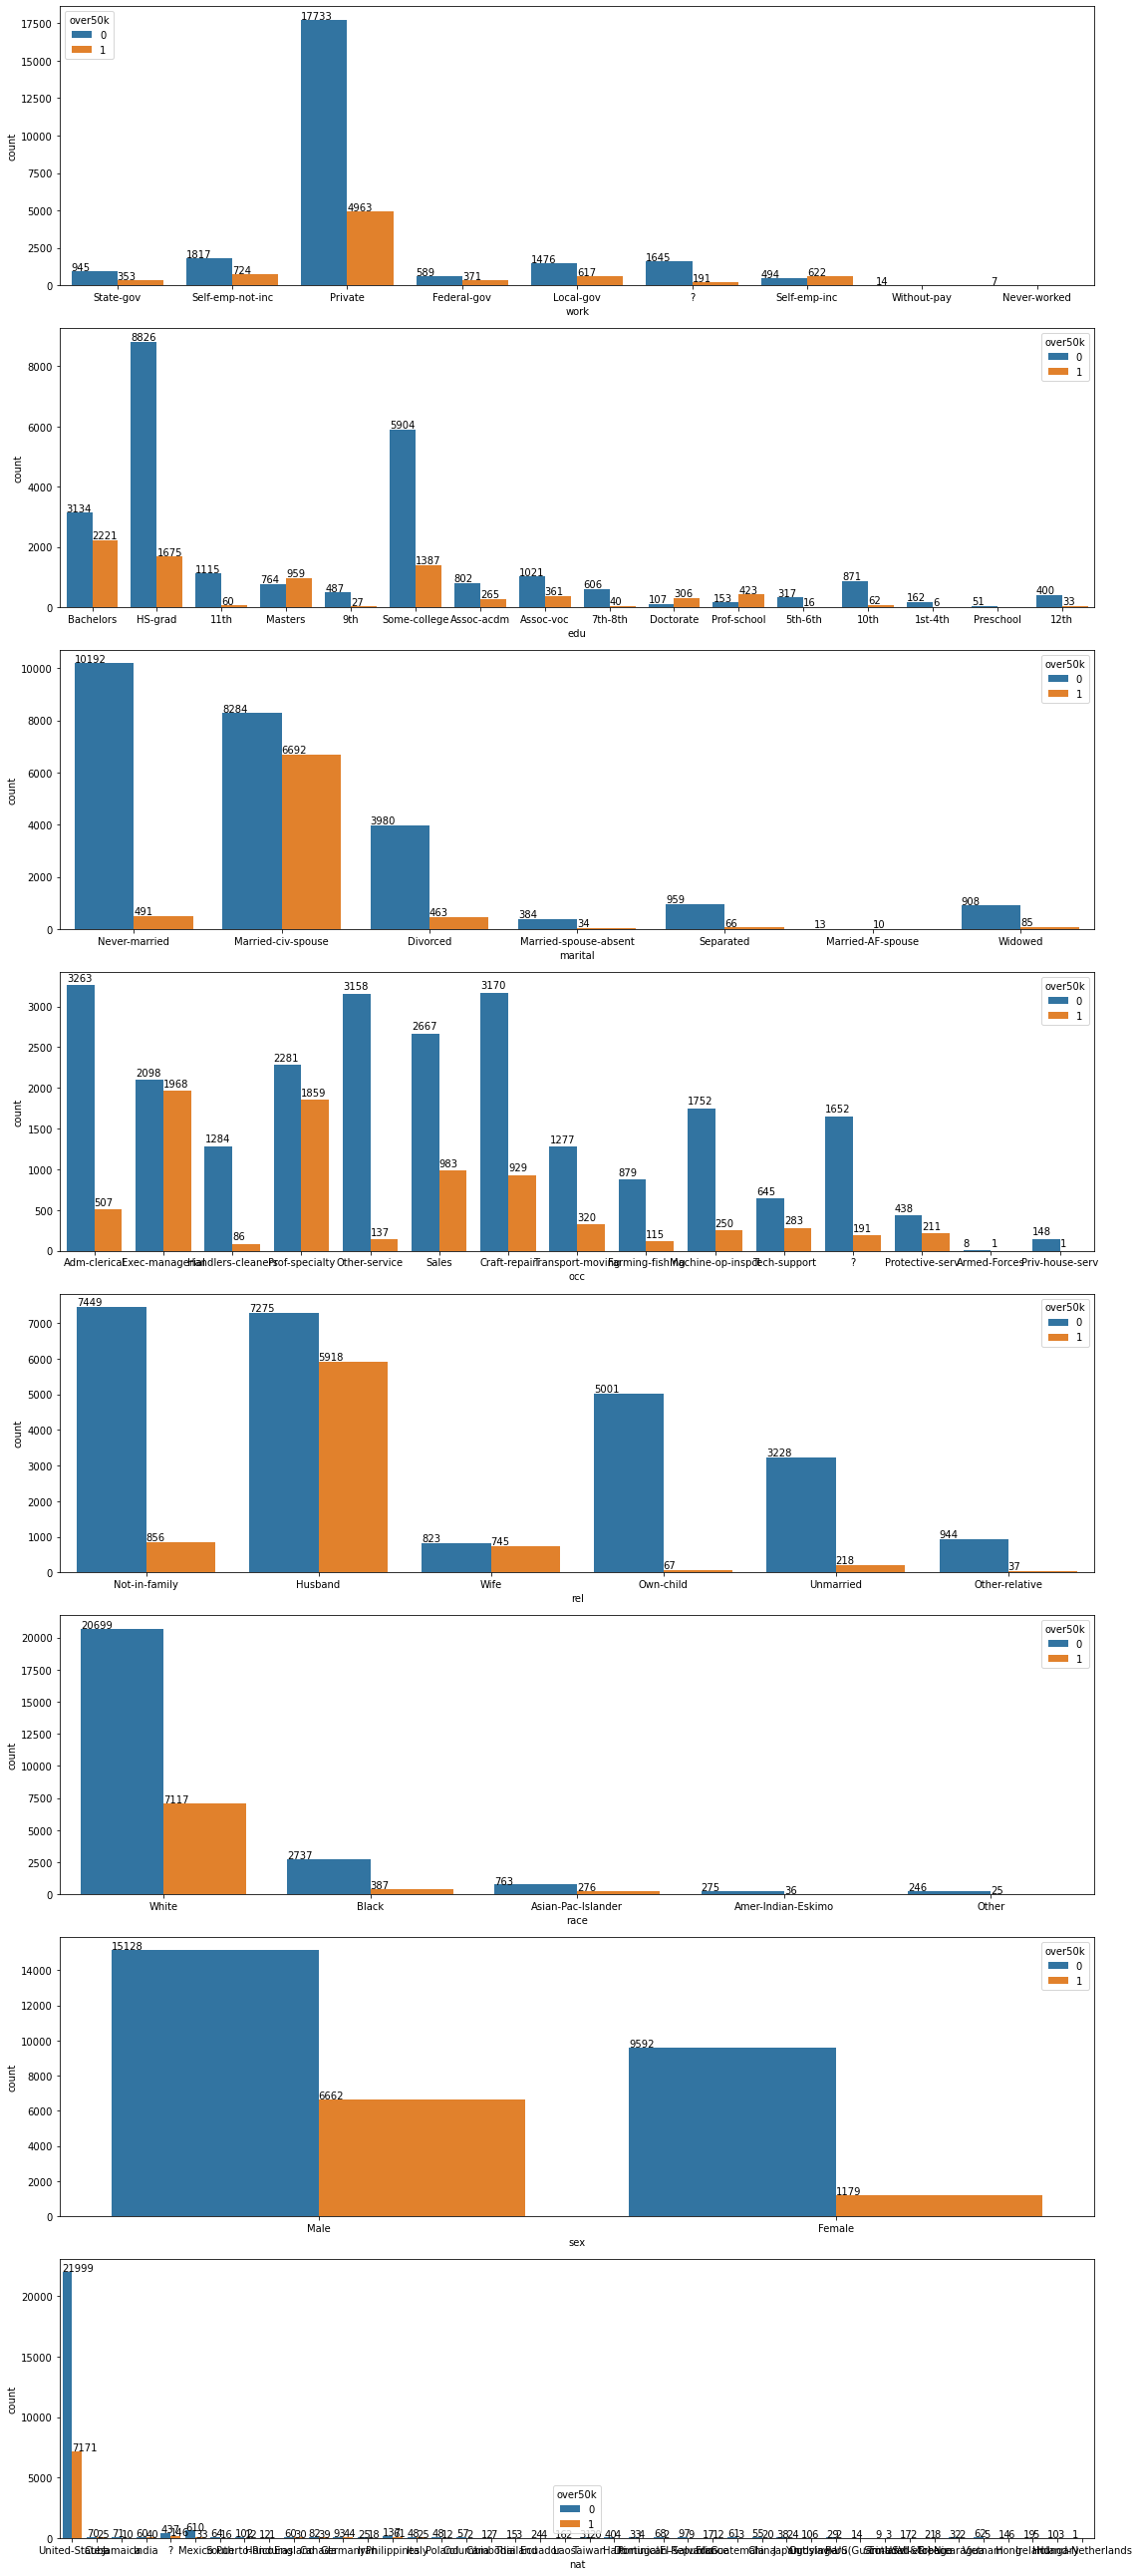

In [15]:
#(2) # Your code goes here
column = len(income.columns)-1
plt.subplots(column, figsize=(16,36))
for ii, feature in enumerate(income):
    if(feature=="over50k"):continue
    plt.subplot(column, 1, ii+1)
    ax=sns.countplot(x=feature, hue='over50k', data=income)
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()-0.00, p.get_height()+50))

plt.tight_layout()
plt.show()

(3) Comment on the plots you've created.  Are there rare categories? Do the features look like they will be good for the classification task 

***your answer goes here***  
There are some rare categories, like "with-out pay" and "never-worked" on work feature and lots of rare countries on nat feature.  
No, as these rare categories may have a lot of uncertainty and do not present that category very well, we can try to merge some rare categories to a single category.  
Like for the national feature, as about 90% of person are origin from the US, probrally we can just transform this feature to isUS(yes or not).

\pagebreak

# ========== Question 2.3 --- [12 marks] ==========

Answer the following questions: 
1. [Code] Set **target_encoded** to be the array of class values, and show some the values for some of the instances.
2. [Code] Use OrdinalEncoder to transform the categorical feature values to numeric values
3. [Code] Store the encodings in a data frame called income_encoded.  Show the feature values for some of the instances. 

(1) Set ***target_encoded*** to be the array of class values, and show the values for ten of the instances.

In [16]:
#(1) # Your code goes here
target_encoded={}
for i in income:
    target_encoded[i]=[]
    for j in income[i].unique():
        target_encoded[i].append(j)
target_encoded

{'work': ['State-gov',
  'Self-emp-not-inc',
  'Private',
  'Federal-gov',
  'Local-gov',
  '?',
  'Self-emp-inc',
  'Without-pay',
  'Never-worked'],
 'edu': ['Bachelors',
  'HS-grad',
  '11th',
  'Masters',
  '9th',
  'Some-college',
  'Assoc-acdm',
  'Assoc-voc',
  '7th-8th',
  'Doctorate',
  'Prof-school',
  '5th-6th',
  '10th',
  '1st-4th',
  'Preschool',
  '12th'],
 'marital': ['Never-married',
  'Married-civ-spouse',
  'Divorced',
  'Married-spouse-absent',
  'Separated',
  'Married-AF-spouse',
  'Widowed'],
 'occ': ['Adm-clerical',
  'Exec-managerial',
  'Handlers-cleaners',
  'Prof-specialty',
  'Other-service',
  'Sales',
  'Craft-repair',
  'Transport-moving',
  'Farming-fishing',
  'Machine-op-inspct',
  'Tech-support',
  '?',
  'Protective-serv',
  'Armed-Forces',
  'Priv-house-serv'],
 'rel': ['Not-in-family',
  'Husband',
  'Wife',
  'Own-child',
  'Unmarried',
  'Other-relative'],
 'race': ['White',
  'Black',
  'Asian-Pac-Islander',
  'Amer-Indian-Eskimo',
  'Other'],


(2) Use OrdinalEncoder to transform the categorical feature values to numeric values

In [17]:
#(2) # Your code goes here
enc = OrdinalEncoder()
income[income.columns[:]] = enc.fit_transform(income)
income

,work,edu,marital,occ,rel,race,sex,nat,over50k
0,7.00,9.00,4.00,1.00,1.00,4.00,1.00,39.00,0.00
1,6.00,9.00,2.00,4.00,0.00,4.00,1.00,39.00,0.00
2,4.00,11.00,0.00,6.00,1.00,4.00,1.00,39.00,0.00
3,4.00,1.00,2.00,6.00,0.00,2.00,1.00,39.00,0.00
4,4.00,9.00,2.00,10.00,5.00,2.00,0.00,5.00,0.00
...,...,...,...,...,...,...,...,...,...
32556,4.00,7.00,2.00,13.00,5.00,4.00,0.00,39.00,0.00
32557,4.00,11.00,2.00,7.00,0.00,4.00,1.00,39.00,1.00
32558,4.00,11.00,6.00,1.00,4.00,4.00,0.00,39.00,0.00
32559,4.00,11.00,4.00,1.00,3.00,4.00,1.00,39.00,0.00


(3) Store the encodings in a data frame called income_encoded.  Show the feature values for the first five instances. 

In [18]:
#(3) # Your code goes here
income_encoded=income
income_encoded.head()

,work,edu,marital,occ,rel,race,sex,nat,over50k
0,7.00,9.00,4.00,1.00,1.00,4.00,1.00,39.00,0.00
1,6.00,9.00,2.00,4.00,0.00,4.00,1.00,39.00,0.00
2,4.00,11.00,0.00,6.00,1.00,4.00,1.00,39.00,0.00
3,4.00,1.00,2.00,6.00,0.00,2.00,1.00,39.00,0.00
4,4.00,9.00,2.00,10.00,5.00,2.00,0.00,5.00,0.00


\pagebreak

# ========== Question 2.4 --- [22 marks] ==========

Answer the following questions: 
1. [Code]  Set ***X*** to be the data frame of independent variables, and ***y*** the array of dependent variables. Split the data into training and test sets using test_train_split, with a testing fraction of 20%, and setting the random state to zero for consistency.
2. [Code] A simple baseline for classification tasks is to always predict the most common class.  Create an array of predictions according to this baseline, and show the following performance statistics: number of missclassified instances, accuracy, F1, precision, recall.
3. [Code]  Creat a confusion matrix and display it as an annotated heatmap (use sns_heatmap).
4. [Text] Comment on what you see in the statistics from (2) and the confusion matrices in (3)

(1) Set ***X*** to be the data frame of independent variables, and ***y*** the array of dependent variables. Split the data into training and test sets using ***test_train_split***, with a testing fraction of 20%, and setting the random state to zero for consistency.

In [19]:
#(1) # Your code goes here
X=income_encoded.drop(["over50k"],axis=1)
y=income_encoded["over50k"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(2) A simple baseline for classification tasks is to always predict the most common class in the training set (highest prior probability).  Print the class with the highest prior probability.  Create an array of predictions on the training set you just made, according to this baseline, and show the following performance statistics: number of missclassified instances, accuracy, F1, precision, recall.

In [20]:
#(2) # Your code goes here
print("over50k==1:{}".format(len(income_encoded[income_encoded["over50k"]==1])))
print("over50k==0:{}".format(len(income_encoded[income_encoded["over50k"]==0])))
pred0=[0]*len(y_train)
print("number of missclassified instances:{:.0f}".format((1-accuracy_score(y_train,pred0))*len(y_train)))
def afpr(y_true,y_pred):
    print("accuracy:{:.2f}".format(accuracy_score(y_true,y_pred)))
    print("F1:{:.2f}".format(f1_score(y_true,y_pred)))
    print("precision:{:.2f}".format(precision_score(y_true,y_pred)))
    print("recall:{:.2f}".format(recall_score(y_true,y_pred)))
afpr(y_train,pred0)

over50k==1:7841
over50k==0:24720
number of missclassified instances:6246
accuracy:0.76
F1:0.00
precision:0.00
recall:0.00


3. Create a confusion matrix between the training targets for the baseline predictor, and the normalised confusion matrix.  Display the confusion matrix.  Also display the normalised confusion matrix as an annotated heatmap. ***Hint:*** Use the plot_confusion_matrix function from the labs for the heatmap.

[[19802     0]
 [ 6246     0]]


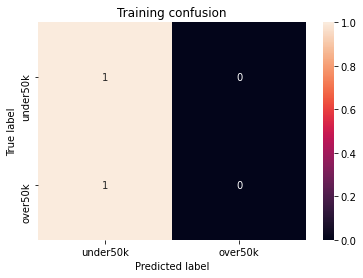

In [21]:
#(3) # Your code goes here
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_train, pred0)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
print(cm)
plt.show()
plot_confusion_matrix(cm_norm, title='Training confusion',classes=['under50k','over50k'])
plt.show()

(4) Comment on what you see in the statistics from (2) and the confusion matrices in (3)

(4) ***your answer goes here***  
By simplify predict all sample is under50k, this baseline predictor gets a 76% accuracy but get 0 on F1-score, precision and recall.
As the class distribution is not balanced, so this baseline predictor could get relatively high accuracy, but it can not found any positive sample(over50k), so it is useless for identify over50k people, and therefore give it 0 on F1-score, precision and recall.

\pagebreak

# ========== Question 2.5 --- [22 marks] ==========

Answer the following questions: 
1. [Code] Train a categorical Naive Bayes classifier on the training data you made.
2. [Code] Report the classifier's accuracy, precision and recall and F1 on the **training** dataset.  Also report the confusion matrix and the normalised confusion matrix for the result.
3. [Text] Interpret the values of the accuracy, F1, precision and recall. Comment on the performance of the model, comparing to the baseline. Is the accuracy a reasonable metric to use for this dataset? Interpret the numbers in the confusion matrix. Does it look like you would expect to find in a "good" classifier?

(1) Train a categorical Naive Bayes model on the training data you made,and it's predictions on the same training data.

In [22]:
# (1) Your code goes here
clf = CategoricalNB()
clf.fit(X_train, y_train)
pre_train=clf.predict(X_train)
pre_train

array([0., 0., 0., ..., 0., 1., 0.])

(2) Report the classifier's accuracy, precision and recall and F1 on the training dataset.  Also report the confusion matrix and the normalised confusion matrix for the result.

accuracy:0.79
F1:0.63
precision:0.55
recall:0.74
[[16087  3715]
 [ 1629  4617]]


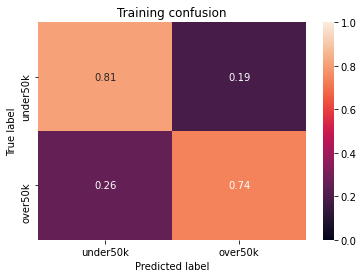

In [23]:
# (2) # Your code goes here
afpr(y_train,pre_train)
cm = confusion_matrix(y_train, pre_train)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
print(cm)
plt.show()
plot_confusion_matrix(cm_norm, title='Training confusion',classes=['under50k','over50k'])
plt.show()

3. Interpret the values of the accuracy, F1, precision and recall. Comment on the performance of the model, comparing to the baseline. Is the accuracy a reasonable metric to use for this dataset? Interpret the numbers in the confusion matrix. Does it look like you would expect to find in a "good" classifier?

***your answer goes here***  
Accuracy = 1 - Error, it represents how much percentage of samples are classified right  
F1 = 2 / (1 / Recall + 1 / Precision), it defined as the harmonic mean of precision and recall, plays as a way of combining the precision and recall of the model  
precision = TP / (TP + FP), it shows the percentage of positive out of what we predicted was positive  
recall = True Positive rate = TP / (TP + FN), it shows how much percentage of positive samples are classified right  
Although the accuracy of it is only a bit better than baseline, the other metrics are all much better than baseline, that means it could provide much more information than the ordinary baseline.  
Accuracy is not a reasonable metric in here, as the class labels are not balanced, the baseline predictor could get a good accuracy but can not provide any information.  
the confusion matrix means, 81% under50k sample are classified right, and 19% are wrong. While 26% of over50k sample are classified as under50k, and 74% sample is classified right.  
In my opinion, I would say it is good. As it gets a 0.74 recall, which means it could found 74% of relatively rich people, and 0.55 precision is also a high enough value, as the people’s income does have a certain number of randomness which can't be fully handled by an ML model.

\pagebreak

# ========== Question 2.6 --- [14 marks] ==========

Answer the following questions: 
1. [Code] Now evaluate the classifier on the testing data you made.  Report the classifier's accuracy, precision and recall and F1 on the testing dataset.  Also report the confusion matrix and the normalised confusion matrix for the result.
2. [Text] In a short paragraph (2-3 sentences) compare and comment on the results with the training data.
3. [Text] Since the categorical data has been encoded as numbers, we could now train a GNB on the data.  Would you expect the GNB to perform better or worse than the CNB, and why?

(1) Now evaluate the classifier on the testing data you made.  Report the classifier's accuracy, precision and recall and F1 on the testing dataset.  Also report the confusion matrix and the normalised confusion matrix for the result.

accuracy:0.79
F1:0.62
precision:0.55
recall:0.73
[[3957  961]
 [ 436 1159]]


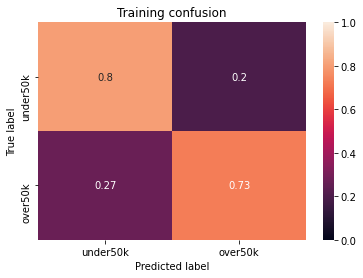

In [24]:
# (1) # Your code goes here
pre_test=clf.predict(X_test)
afpr(y_test,pre_test)
cm = confusion_matrix(y_test, pre_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
print(cm)
plt.show()
plot_confusion_matrix(cm_norm, title='Training confusion',classes=['under50k','over50k'])
plt.show()

(2) In a short paragraph (2-3 sentences) compare and comment on the results with the training data.

(2) ***your answer goes here***  
I found this model get nearly the same result on the test set and training set, so there is no overfitting. I consider this may because 1.the sample size is large enough 2.there is little bias on the training set 3.the feature number is far less than the sample size.

 (3) Since the categorical data has been encoded as numbers, we could now train a GNB on the data.  Would you expect the GNB to perform better or worse than the CNB, and why? 

(3) ***your answer goes here***  
I expect the GNB would perform worse than CNB, as GNB assume that "the likelihood of the features is to be Gaussian", but in here, that numbers data are essentially the representative of the categorical data (so impossible to be Gaussian likelihood). As the assume is fully wrong, I expect it would also get worse performance.

\pagebreak

In [25]:
# This cell's output will confirm all cells have been run if you select Kernel->Restart & Run All.
# Wait until you see the output printed
print("*****************************")
print("*                           *")
print("* All cells have been run!! *")
print("*                           *")
print("*****************************")

*****************************
*                           *
* All cells have been run!! *
*                           *
*****************************
